Probability of a girl birth given placenta previa (BDA3 p. 37).
437 girls and 543 boys have been observed. Calculate and plot the posterior distribution of the proportion of girls $\theta $, using
uniform prior on $\theta $. Note that the proportion of female births in general population is 0.485.

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta
from scipy.stats import poisson
from scipy.stats import gamma

In [6]:
import os, sys
util_path = os.path.abspath(os.path.join(os.curdir, '../utils'))
if util_path not in sys.path and os.path.exists(util_path):
    sys.path.insert(0, util_path)
import plot_tools

In [7]:
# edit default plot settings
plt.rc('font', size=12)

### Uniform prior $p(\theta) \propto 1$
The posterior distribution is Beta(438, 544). Plot the distribution.

Uniform prior -> Posterior is Beta(438,544)


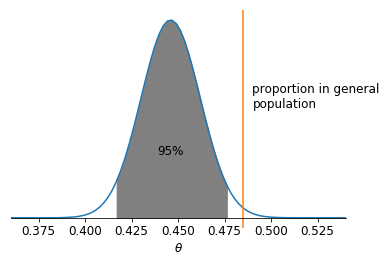

In [8]:
x = np.linspace(0.36, 0.54, 80)
dist = beta(438,544)
pd = dist.pdf(x)
print('Uniform prior -> Posterior is Beta(438,544)');
plt.plot(x, pd)
# show only x-axis
plot_tools.modify_axes.only_x()

# proportion of femal birth in general population
plt.axvline(0.485, color='C1')
plt.annotate(
    'proportion in general\npopulation',
    (0.485 + 0.005, 14),
    ha='left'  # horizontalalignment
)
x_95_idx = (x > dist.ppf(0.025)) & (x < dist.ppf(0.975))
plt.fill_between(x[x_95_idx], pd[x_95_idx], color='0.5')
plt.text(dist.median(), 8, '95%', horizontalalignment='center')
plt.xlabel(r'$\theta$')

plt.autoscale(axis='x', tight=True);

In [9]:
# posterior mean P(theta|y)
print('posterior mean of theta: ', dist.mean())
print('posterior standard deviation: ', dist.std())

posterior mean of theta:  0.4460285132382892
posterior standard deviation:  0.015854343318208036


### Nonuniform prior $p(\theta)$

In [10]:
x = np.linspace(0.375, 0.525, 150)

# posterior with data (437,543) and uniform prior Beta(1,1)
au = 438
bu = 544
# calculate densities
pdu = beta.pdf(x, au, bu)

# compare 3 cases
# arrays of different priors:
# Beta(0.485*n, (1-0.485)*n), for n = 2, 20, 200
ap = np.array([0.485 * (2*10**i) for i in range(3)])
bp = np.array([(1-0.485) * (2*10**i) for i in range(3)])

# corresponding posteriors with data (437,543)
ai = 437 + ap
bi = 543 + bp
# calculate prior and posterior densities
pdp = beta.pdf(x, ap[:,np.newaxis], bp[:,np.newaxis])
pdi = beta.pdf(x, ai[:,np.newaxis], bi[:,np.newaxis])

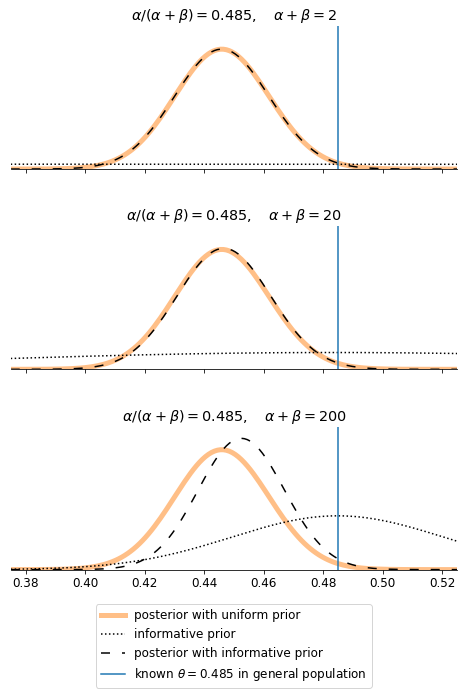

In [11]:
# plot 3 subplots
fig, axes = plt.subplots(
    nrows=3, ncols=1, sharex=True, sharey=True, figsize=(8, 10))
# show only x-axis
plot_tools.modify_axes.only_x(axes)
# manually adjust spacing
fig.subplots_adjust(hspace=0.4)

# 3 subplots
for i, ax in enumerate(axes):
    # plot three precalculated densities
    post1, = ax.plot(x, pdu, color=plot_tools.lighten('C1'), linewidth=5)
    prior, = ax.plot(x, pdp[i], 'k:')
    post2, = ax.plot(x, pdi[i], color='k', dashes=(6 , 8))
    # add vertical line
    known = ax.axvline(0.485, color='C0')
    # set the title for this subplot
    ax.set_title(
        r'$\alpha/(\alpha+\beta) = 0.485,\quad \alpha+\beta = {}$'
        .format(2*10**i)
    )
# limit x-axis
axes[0].autoscale(axis='x', tight=True)
axes[0].set_ylim((0,30))
# add legend to the last subplot
axes[-1].legend(
    (post1, prior, post2, known),
    ( 'posterior with uniform prior',
      'informative prior',
      'posterior with informative prior',
     r'known $\theta=0.485$ in general population'),
    loc='upper center',
    bbox_to_anchor=(0.5, -0.2)
);


### Using simulation for inference
Simulate samples from Beta(438,544), draw a histogram with quantiles, and do the same for a transformed variable.

phi 95% interval  1.0979749064652193 1.4110789227394978


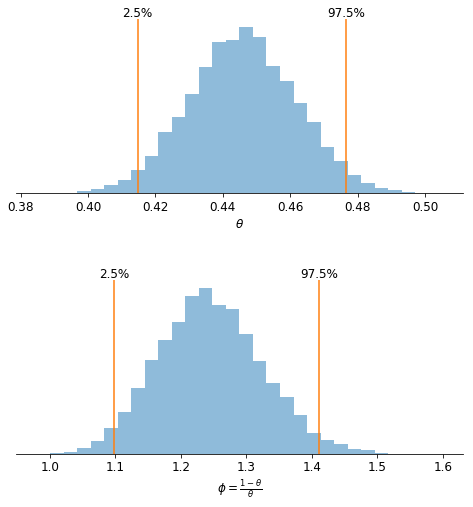

In [12]:
# plotting grid
x = np.linspace(0.36, 0.54, 150)

# draw n random samples from Beta(438,544)
n = 10000
th = beta.rvs(438, 544, size=n)  # rvs comes from `random variates`

# plot 2 subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))
# show only x-axis
plot_tools.modify_axes.only_x(axes)
# manually adjust spacing
fig.subplots_adjust(hspace=0.5)

# plot histogram
axes[0].hist(th, bins=30, color=plot_tools.lighten('C0'))
# compute 2.5% and 97.5% quantile approximation using samples
th25, th975 = np.percentile(th, [2.5, 97.5])
# draw lines for these
axes[0].axvline(th25, color='C1')
axes[0].axvline(th975, color='C1')
axes[0].text(
    th25,
    axes[0].get_ylim()[1]+15,
    '2.5%',
    horizontalalignment='center'
)
axes[0].text(
    th975,
    axes[0].get_ylim()[1]+15,
    '97.5%',
    horizontalalignment='center'
)
axes[0].set_xlabel(r'$\theta$')

# plot histogram for the transformed variable
phi = (1-th)/th
axes[1].hist(phi, bins=30, color=plot_tools.lighten('C0'))
# compute 2.5% and 97.5% quantile approximation using samples
phi25, phi975 = np.percentile(phi, [2.5, 97.5])
print('phi 95% interval ', phi25, phi975)
# draw lines for these
axes[1].axvline(phi25, color='C1')
axes[1].axvline(phi975, color='C1')
axes[1].text(
    phi25,
    axes[1].get_ylim()[1]+15,
    '2.5%',
     horizontalalignment='center'
)
axes[1].text(
    phi975,
    axes[1].get_ylim()[1]+15,
    '97.5%',
    horizontalalignment='center'
)
axes[1].set_xlabel(r'$\phi = \frac{1-\theta}{\theta}$');

$\phi$ is the ratio of boy to girl births. From the second plot above, we have the 95% confidence interval $[1.09712531305, 1.41129270954]$ that more boys are born.

### Using a nonconjugate prior distribution

Calculate the posterior distribution on a discrete grid of points by multiplying the likelihood and a non-conjugate prior at each point, and normalizing over the points. Simulate samples from the resulting non-standard posterior distribution using inverse cdf using the discrete grid.

**Calculate result**

In [13]:
# data (437,543)
a = 437
b = 543

# grid of nx points
nx = 1000
x = np.linspace(0, 1, nx)

# compute density of non-conjugate prior in grid
# this non-conjugate prior is same as in Figure 2.4 in the book
pp = np.ones(nx)
ascent = (0.385 <= x) & (x <= 0.485)
descent = (0.485 <= x) & (x <= 0.585)
pm = 11
pp[ascent] = np.linspace(1, pm, np.count_nonzero(ascent))
pp[descent] = np.linspace(pm, 1, np.count_nonzero(descent))
# normalize the prior
pp /= np.sum(pp)

# unnormalised non-conjugate posterior in grid
# original code forgot to add 1
po = beta.pdf(x, a + 1, b +1)*pp
po /= np.sum(po)
# cumulative
pc = np.cumsum(po)

# inverse-cdf sampling of posterior
# get n uniform random numbers from [0,1]
n = 10000
r = np.random.rand(n)
# map each r into corresponding grid point x:
rr = x[np.sum(pc[:,np.newaxis] < r, axis=0)]

In the last part of the above code, we perform sampling from the genereated (discrete) posterior distribution. The theory behind this process is the following theorem (Casella, p53):

Theorem 2.1.4
Let X have a continous cdf $F_{X}(x)$ and define the random variable as $Y = F_X(X)$, then X is uniformly distributed on (0,1), that is $P(Y \leq y) = y, 0 \leq y \leq 1$.

We can use this theorem to generate randome samples from a particular distribution. If it is required to generate an observation x from a popluation with cdf $F_X$, we need only generate a uniform random number u, between 0 and 1 and solve for x in the equation $F_X(x) = y$.

In fact $x = F_X^{-1}(y)$, where $ F_X^{-1}(y) = inf\{x: F_X(x) \geq y\}$. This was implemented as

`rr = x[np.sum(pc[:,np.newaxis] < r, axis=0)]`

For simplicity consider r as a number and pc as a column vector then pc < r give us the column of True/False values. By summing over the row, we will determine the index into the x array. This is the sample from posterior distribution: r-->x.

- pc as a column vector: `pc[:,np.newaxis] < r`
- numpy broadcasting mechanism is at work here: `pc[:,np.newaxis] < r`




**Plot results**

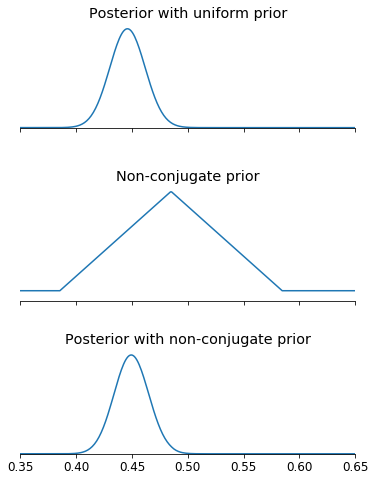

In [14]:
# plot 3 subplots
fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(6, 8))
# show only x-axis
plot_tools.modify_axes.only_x(axes)
# manually adjust spacing
fig.subplots_adjust(hspace=0.5)

# posterior with uniform prior Beta(1,1)
axes[0].plot(x, beta.pdf(x, a+1, b+1))
axes[0].set_title('Posterior with uniform prior')

# non-conjugate prior
axes[1].plot(x, pp)
axes[1].set_title('Non-conjugate prior')

# posterior with non-conjugate prior
axes[2].plot(x, po)
axes[2].set_title('Posterior with non-conjugate prior')

# cosmetics
#for ax in axes:
#    ax.set_ylim((0, ax.get_ylim()[1]))

# set custom x-limits
axes[0].set_xlim((0.35, 0.65));

Text(0.5, 1.0, 'inverse cdf sampling')

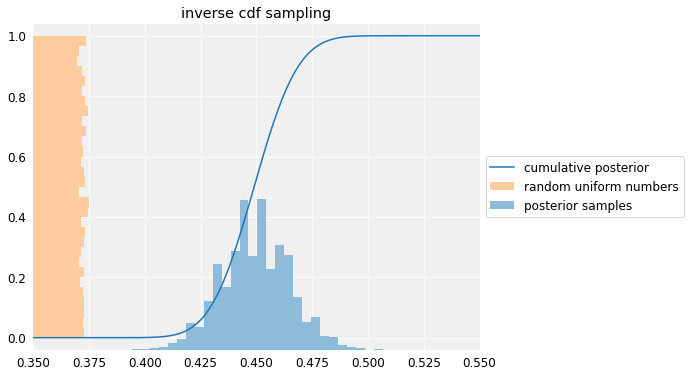

In [15]:
# plot samples

# apply custom background plotting style
plt.style.use(plot_tools.custom_styles['gray_background'])
plt.figure(figsize=(8, 6))

# calculate histograms and scale them into the same figure
hist_r = np.histogram(r, bins=30)
hist_rr = np.histogram(rr, bins=30)
plt.barh(
    hist_r[1][:-1],
    hist_r[0]*0.025/hist_r[0].max(),
    height=hist_r[1][1]-hist_r[1][0],
    left=0.35,
    align='edge',
    color=plot_tools.lighten('C1', 0.6),
    label='random uniform numbers'
)
plt.bar(
    hist_rr[1][:-1],
    hist_rr[0]*0.5/hist_rr[0].max(),
    width=hist_rr[1][1]-hist_rr[1][0],
    bottom=-0.04,
    align='edge',
    color=plot_tools.lighten('C0'),
    label='posterior samples'
)
# plot cumulative posterior
plt.plot(
    x,
    pc,
    color='C0',
    label='cumulative posterior'
)
# turn spines off

# legend
plt.legend(
    loc='center left',
    bbox_to_anchor=(1.0, 0.5),
    fontsize=12
)
# set limits
plt.xlim((0.35, 0.55))
plt.ylim((-0.04, 1.04));
plt.gca().set_title('inverse cdf sampling')

# Estimating a rate  from Poisson data

A data point y follows the Poisson distribution has the pmf:

$$p(y|\theta) = \frac{\theta^ye^{-\theta}}{y!}, \text{y = 0,1,2,...}$$

**Problem**: Suppose we have a city whose population is 200,000 people. We observer there are 3 people that died of asthma. We want to estimate the underlying asthma mortality rate of this city.

**Solution**: We use Poisson distribution to model the number of people, y, that died of asthma. So in our case we have $y = 3$, we want to infer $\theta$.

Suppose the prior distribution is $\theta \sim Gamma(\alpha,\beta)$

Under the Poisson models the number of deaths, y, in a city of 200,000 in one year, can be expressed as $Poisson(2\theta)$, where $\theta$ represents the truth underlying long-term asthma mortality rate in the city (measusred in cases per 100,000 persons per year). We the have

$$p(y|\theta) \propto \theta^{\sum_{i=1}^{n}y_i}e^{-(\sum_{i=1}^{n}x_i)\theta}$$

and the resulting posterior distribution is:

$$\theta |y \sim Gamma(\alpha + \sum_{i=1}^{n}y_i, \beta + \sum_{i=1}^{n}x_i)$$


Now we have, in our city,  $\sum_{i=1}^{n}y_i = 3$ and $\sum_{i=1}^{n}x_i = 2$ (single observation). Using prior as $Gamma(3,5)$

Note that for ``gamma`` of scipy, we need two parameters:
- shape parameter a,  with $a = \alpha$
- scale parameter $1/\lambda$, with $\beta = \lambda$

So in order to create $Gamma(\alpha, \beta)$, in scipy, we need to construct ``gamma(a=alpha, scale=1/beta)




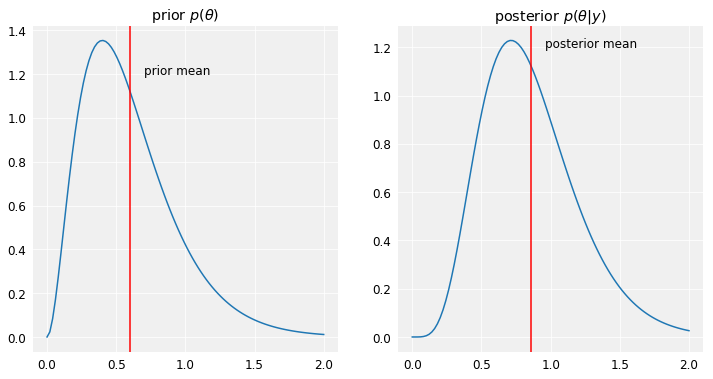

In [16]:
# prior
alpha = 3
beta = 5
theta = np.linspace(0, 2, 100)
prior = gamma.pdf(theta, a=alpha, scale=1/beta)

# posterior
sum_y = 3
sum_x = 2
post = gamma.pdf(theta, a= alpha + sum_y, scale=1/(beta + sum_x))
# visualize
fig = plt.figure(figsize=(12,6))
axes = fig.subplots(nrows=1, ncols=2)
axes[0].plot(theta, prior)
axes[0].axvline(alpha/beta, 0, 1.4, color='r');
axes[0].set_title(r'prior $p(\theta)$');
axes[0].annotate(
    'prior mean',
    (0.6 + 0.1, 1.2),
    ha='left'  # horizontalalignment
)
axes[1].plot(theta, post)
axes[1].axvline((alpha + sum_y) / (beta + sum_x), 0, 1.4, color='r')
axes[1].set_title(r'posterior $p(\theta|y)$');
axes[1].annotate(
    'posterior mean',
    (0.86 + 0.1, 1.2),
    ha='left'  # horizontalalignment
);

In [17]:
print('p(theta >1 |y) = ',  1- gamma(alpha + sum_y, scale=1/(beta + sum_x)).cdf(1))

p(theta >1 |y) =  0.3007082761743609


In [18]:
from scipy.stats import gamma

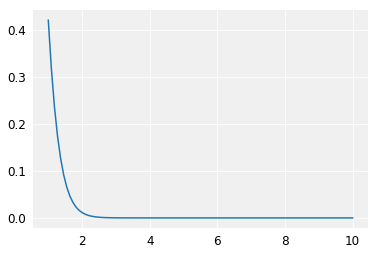

In [19]:
x = np.linspace(1,10,100)
plt.plot(x, gamma(a=3,scale=1/5).pdf(x))

In [20]:
gamma(a=3,scale=1/5).mean()

0.6000000000000001

# Hierarchical model (short intro)

In the probablem of estimating the ratio of femal births/ male births in womans having placenta previa condition, we use the same data with different prior. We will do the oppostive in this section. We will use the same prior with different inferences each bases on different datasets.